# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



In [2]:
import pandas as pd

df = pd.read_csv("fetch_california_housing.csv")

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Dataset Summary — California Housing

**Where did it come from?**  
The dataset comes from the California Census and is distributed through Scikit-learn. The Kaggle version is a mirrored upload of that dataset :contentReference[oaicite:0]{index=0}.

**How was it collected?**  
It is based on aggregated U.S. Census data at the district (block group) level :contentReference[oaicite:1]{index=1}.

**What are the features?**  
Median income, house age, average rooms, average bedrooms, population, average occupancy, latitude, longitude, and median house value :contentReference[oaicite:2]{index=2}.

**Why is it interesting to me?**  
As a California homeowner, it helps me understand how income, location, and housing characteristics relate to home values across the state. This awareness allows me to: Make more informed decisions about buying, selling, or investing; and better interpret market trends beyond anecdotal observations

## Five Interesting Questions

1. How strongly is median income (MedInc) correlated with median house value (MedHouseVal)?

2. Do coastal areas (based on latitude and longitude) have higher median house values than inland areas?

3. How does house age (HouseAge) relate to median house value? Do newer or older areas have higher prices?

4. Does population density (Population or AveOccup) affect median house value?

5. Do districts with larger average homes (AveRooms) have higher median house values?


Correlation (MedInc vs MedHouseVal): 0.688


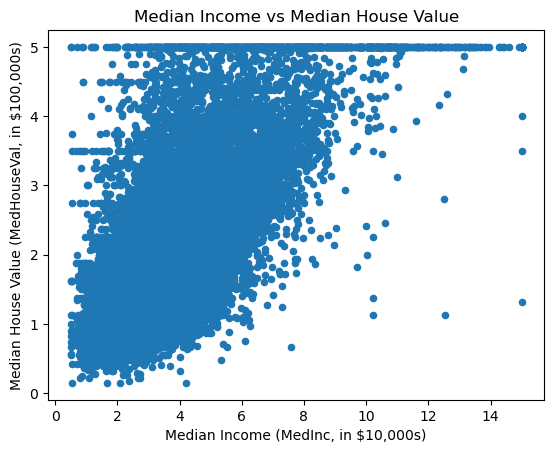

In [3]:
# Q1) How strongly is MedInc correlated with MedHouseVal?

import matplotlib.pyplot as plt

# Compute Pearson correlation using Pandas
corr = df[["MedInc", "MedHouseVal"]].corr().loc["MedInc", "MedHouseVal"]
print(f"Correlation (MedInc vs MedHouseVal): {corr:.3f}")

# --- Visualize ---
ax = df.plot(
    kind="scatter",
    x="MedInc",
    y="MedHouseVal",
    title="Median Income vs Median House Value"
)

ax.set_xlabel("Median Income (MedInc, in $10,000s)")
ax.set_ylabel("Median House Value (MedHouseVal, in $100,000s)")

plt.show()


### Answer — Question 1
Median income and house value have a strong positive correlation (~0.69). Higher-income districts generally have higher home values.

In [4]:
# Redefine Coastal vs Inland using better longitude cutoff
df["Coastal"] = np.where(df["Longitude"] < -121, "Coastal", "Inland")

# Recalculate averages
coastal_means = df.groupby("Coastal")["MedHouseVal"].mean()
print(coastal_means)

# Visualize again
ax = coastal_means.plot(
    kind="bar",
    title="Average Median House Value: Coastal vs Inland"
)

ax.set_xlabel("Region")
ax.set_ylabel("Average Median House Value ($100,000s)")
plt.xticks(rotation=0)
plt.show()


NameError: name 'np' is not defined

### Answer — Question 2
Coastal districts have higher average median house values (2.16) than inland districts (2.02).  
This suggests proximity to the coast is associated with higher home prices.


Correlation (HouseAge vs MedHouseVal): 0.106


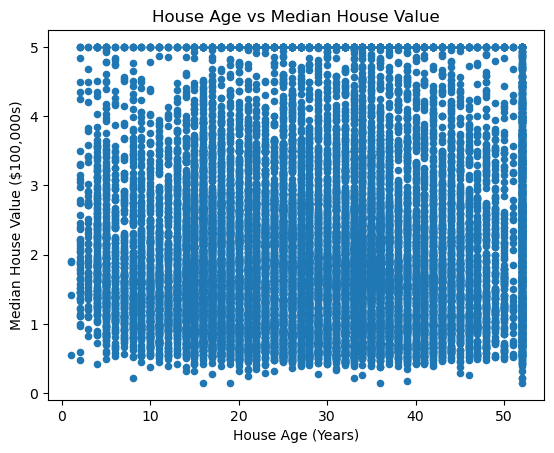

In [5]:
# Q3) How does HouseAge relate to MedHouseVal?
import matplotlib.pyplot as plt

# Correlation between house age and median house value
age_corr = df[["HouseAge", "MedHouseVal"]].corr().loc["HouseAge", "MedHouseVal"]
print(f"Correlation (HouseAge vs MedHouseVal): {age_corr:.3f}")

# Scatter plot to inspect the relationship
ax = df.plot(
    kind="scatter",
    x="HouseAge",
    y="MedHouseVal",
    title="House Age vs Median House Value"
)

ax.set_xlabel("House Age (Years)")
ax.set_ylabel("Median House Value ($100,000s)")

plt.show()


### Answer — Question 3
House age has a very weak positive correlation with median house value (~0.11).  
This indicates that house age alone is not a strong predictor of home prices.


count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64
Correlation (AveOccup vs MedHouseVal, filtered): -0.265


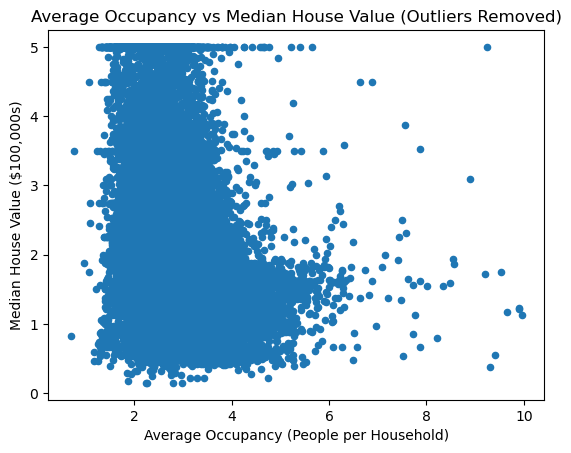

In [6]:
# Q4) Does population density (AveOccup) affect median house value?
import matplotlib.pyplot as plt

# --- Step 1: Inspect distribution ---
print(df["AveOccup"].describe())

# --- Step 2: Remove extreme outliers (keep realistic values under 10) ---
df_q4 = df[df["AveOccup"] < 10].copy()

# --- Step 3: Compute correlation ---
corr_q4 = df_q4[["AveOccup", "MedHouseVal"]].corr().loc["AveOccup", "MedHouseVal"]
print(f"Correlation (AveOccup vs MedHouseVal, filtered): {corr_q4:.3f}")

# --- Step 4: Visualize ---
ax = df_q4.plot(
    kind="scatter",
    x="AveOccup",
    y="MedHouseVal",
    title="Average Occupancy vs Median House Value (Outliers Removed)"
)

ax.set_xlabel("Average Occupancy (People per Household)")
ax.set_ylabel("Median House Value ($100,000s)")

plt.show()


### Answer — Question 4
After removing extreme outliers, average occupancy has a moderate negative correlation with median house value (~ -0.27).
This suggests that areas with more crowded households tend to have lower home values.


count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64
Correlation (AveRooms vs MedHouseVal, filtered): 0.302


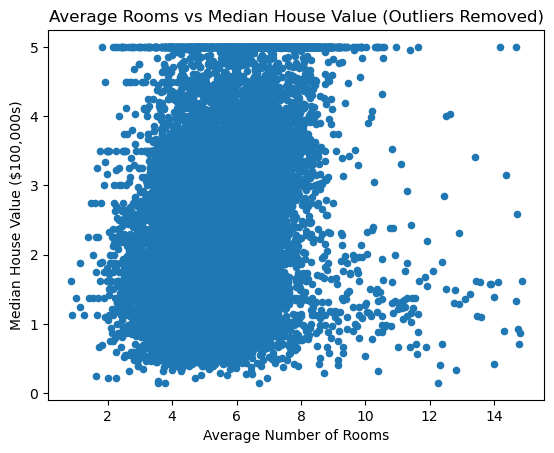

In [7]:
# Q5) Do districts with larger average homes have higher median house values?
import matplotlib.pyplot as plt

# --- Step 1: Inspect distribution ---
print(df["AveRooms"].describe())

# --- Step 2: Remove extreme outliers (keep realistic values under 15) ---
df_q5 = df[df["AveRooms"] < 15].copy()

# --- Step 3: Correlation ---
rooms_corr = df_q5[["AveRooms", "MedHouseVal"]].corr().loc["AveRooms", "MedHouseVal"]
print(f"Correlation (AveRooms vs MedHouseVal, filtered): {rooms_corr:.3f}")

# --- Step 4: Visualize ---
ax = df_q5.plot(
    kind="scatter",
    x="AveRooms",
    y="MedHouseVal",
    title="Average Rooms vs Median House Value (Outliers Removed)"
)

ax.set_xlabel("Average Number of Rooms")
ax.set_ylabel("Median House Value ($100,000s)")

plt.show()


### Answer — Question 5
After removing extreme outliers, average rooms has a moderate positive correlation with median house value (~0.30).
Districts with larger average homes tend to have higher home values.
